In [1]:
import sys
import os
import numpy as np
sys.path.append("methods/RMem/aot_plus")
from matplotlib import pyplot as plt
from torchvision import transforms
from VOSTest import VOSTest
import methods.RMem.aot_plus.dataloaders.video_transforms as tr
from rmem_occlusion_time import FRAME_RATE

/home/chenzixuan/anaconda3/envs/torch/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
from rmem_occlusion_time import cfg


In [25]:
seq_name = "9691_divide_dough"
start_time = 4.0


In [26]:
transform = transforms.Compose([
        tr.MultiRestrictSize(cfg.TEST_MIN_SIZE, cfg.TEST_MAX_SIZE,
                             cfg.TEST_FLIP, cfg.TEST_MULTISCALE,
                             cfg.MODEL_ALIGN_CORNERS),
        tr.MultiToTensor()
    ])
cfg.TEST_FRAME_PATH = 'methods/VOST/JPEGImages_10fps/%s/' % seq_name
cfg.TEST_LABEL_PATH = "methods/VOST/Annotations/%s/" % seq_name
seq_images = np.sort(os.listdir(cfg.TEST_FRAME_PATH))
image_root = "/".join(cfg.TEST_FRAME_PATH.split('/')[:-2])
label_root = "/".join(cfg.TEST_LABEL_PATH.split('/')[:-2])
seq_labels = [seq_images[0].replace('jpg', 'png')]
seq_dataset = VOSTest(image_root,
                        label_root,
                        seq_name,
                        seq_images,
                        seq_labels,
                        transform=None,
                        rgb=True)

In [27]:
step = int(start_time * FRAME_RATE)
sample = seq_dataset[step]
img = sample['current_img'].astype(np.uint8)

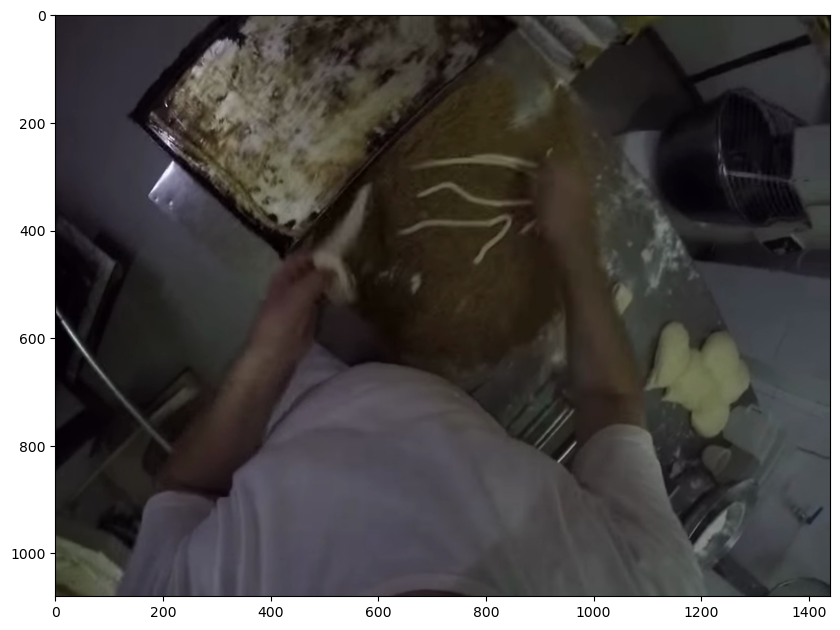

In [28]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('on')
plt.show()

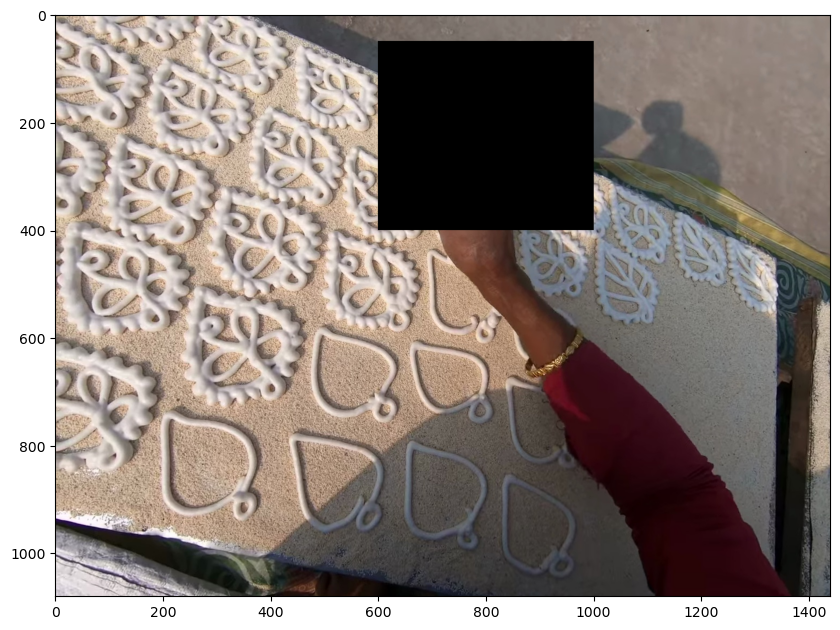

In [12]:
from rmem_occlusion_time import make_masked_frame
import cv2
left=400
top=200
right=1000
bottom=600
masked_frame = np.zeros_like(img)
# 将T时刻的帧复制到黑色图像上
masked_frame += img
# print(type(masked_frame))
masked_frame = np.ascontiguousarray(masked_frame)
cv2.rectangle(masked_frame, (left, top), (right, bottom), (0, 0, 0), -1)
plt.figure(figsize=(10,10))
plt.imshow(masked_frame)
plt.axis('on')
plt.show()